In [2]:
import numpy as np  # Data manipulation
import pandas as pd # Dataframe manipulation 
import matplotlib.pyplot as plt # Plotting the data and the results
import matplotlib.image as mpimg # For displaying imagees
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
size = 249
target_size = (size,size,3)
print(target_size)

(249, 249, 3)


In [4]:
train_datagen1 = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   rescale=1./255)

train_gen1 = train_datagen1.flow_from_directory('./input/gender-classification-dataset/Training',
                                              target_size=(size,size),
                                              batch_size=32,
                                              class_mode='binary')

Found 47005 images belonging to 2 classes.


In [5]:
test_datagen1 = ImageDataGenerator(rescale=1./255)

test_gen1 = test_datagen1.flow_from_directory('./input/gender-classification-dataset/Validation',
                                              target_size=(size,size),
                                              batch_size=32,
                                              class_mode='binary')

Found 11649 images belonging to 2 classes.


In [6]:
#base
model = Sequential()
model.add(Xception(include_top=False, pooling='avg', weights='imagenet', input_shape=target_size))
model.add(Flatten())
model.add(BatchNormalization())
#head
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

model.layers[0].trainable = False

In [9]:
model.summary()
model.compile(optimizer= 'Adam', loss = 'binary_crossentropy', metrics= 'accuracy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization_4 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 batch_normalization_5 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 1024)              2

In [10]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
                                             save_best_only = True,
                                             monitor= 'val_accuracy',
                                             mode = 'max')

In [11]:
epochs = 1
batch_size=256
history1 = model.fit(train_gen1, epochs= epochs, validation_data= test_gen1,
                    steps_per_epoch= len(train_gen1.filenames)//batch_size,
                    validation_steps= len(test_gen1.filenames)//batch_size,
                    callbacks= [checkpoint]
                    )

183/183 [==============================] - 485s 3s/step - loss: 0.6055 - accuracy: 0.7817 - val_loss: 0.3814 - val_accuracy: 0.8062


<Figure size 432x288 with 0 Axes>

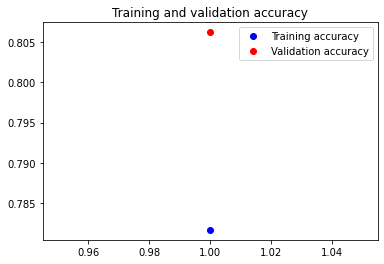

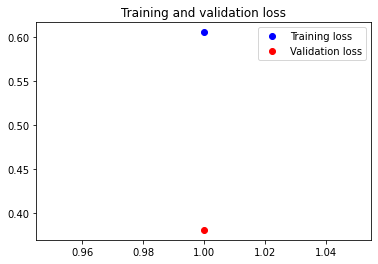

<Figure size 432x288 with 0 Axes>

In [12]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [13]:
test_loss, test_acc = model.evaluate(test_gen1, steps=50)
print('test acc:', test_acc)
print('test_loss:',test_loss)

50/50 [==============================] - 113s 2s/step - loss: 0.3749 - accuracy: 0.8213
test acc: 0.8212500214576721
test_loss: 0.37494590878486633
